# Sensitivity analysis

In [4]:
import os
import sys

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from h2ss import compare

import glob
from itertools import product

In [12]:
cavern_diameter = np.arange(80, 101, step=1)
cavern_height = np.arange(85, 312, step=1)

In [2]:
def generate_sensitivity_data(cavern_diameter, cavern_height):
    """Generate data to perform sensitivity analysis"""
    os.makedirs("data", "sensitivity", exist_ok=True)
    ds, extent, exclusions = compare.load_all_data()
    for d, h in product(cavern_diameter, cavern_height):
        df = compare.capacity_function(ds, extent, exclusions, d, h)
        df.to_csv(os.path.join("data", "sensitivity", f"sensitivity_d{d}_h{h}.csv"))
        print(f"sensitivity_d{d}_h{h}.csv done!")

In [3]:
# generate_sensitivity_data(cavern_diameter, cavern_height)

In [14]:
len(list(product(cavern_diameter, cavern_height)))

4767

In [15]:
len(glob.glob(os.path.join("data", "sensitivity", f"sensitivity_*.csv")))

4767

In [64]:
df = pd.concat((pd.read_csv(f) for f in glob.glob(os.path.join("data", "sensitivity", f"sensitivity_*.csv"))), ignore_index=True)

In [67]:
df.describe()

,Unnamed: 0,cavern_diameter,cavern_height,capacity
count,411526.000000,411526.000000,411526.000000,411526.000000
mean,96.945551,89.058592,134.444152,136.861511
std,86.038928,6.035555,46.248625,65.457658
min,0.000000,80.000000,85.000000,32.603093
25%,26.000000,84.000000,100.000000,88.295325
50%,73.000000,89.000000,120.000000,121.183718
75%,147.000000,94.000000,155.000000,171.652434
max,450.000000,100.000000,311.000000,500.575182


In [68]:
df.drop(columns=["Unnamed: 0"], inplace=True)

## Cavern height

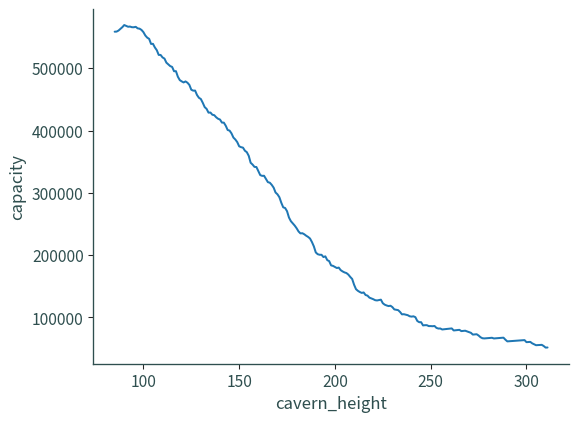

In [34]:
data = df.groupby(["cavern_height"]).sum()[["capacity"]].reset_index()
sns.lineplot(data=data, x="cavern_height", y="capacity")
sns.despine()
plt.show()

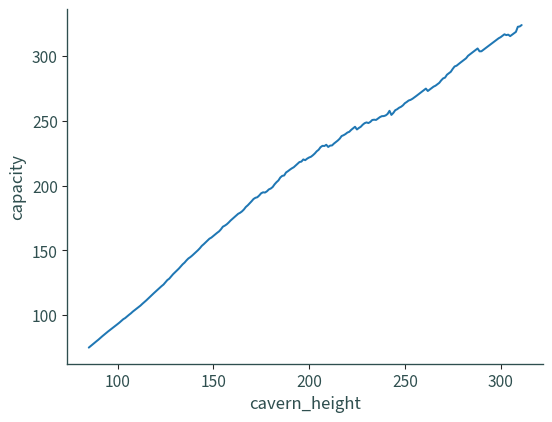

In [44]:
data = df.groupby(["cavern_height"]).mean()[["capacity"]].reset_index()
sns.lineplot(data=data, x="cavern_height", y="capacity")
sns.despine()
plt.show()

## Cavern diameter

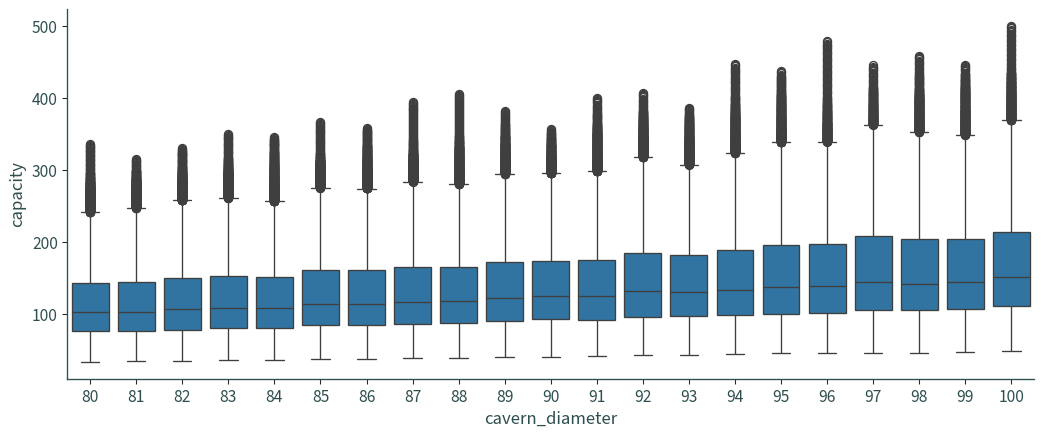

In [118]:
plt.figure(figsize=(13, 5))
sns.boxplot(data=df, y="capacity", x="cavern_diameter")
sns.despine()
plt.show()

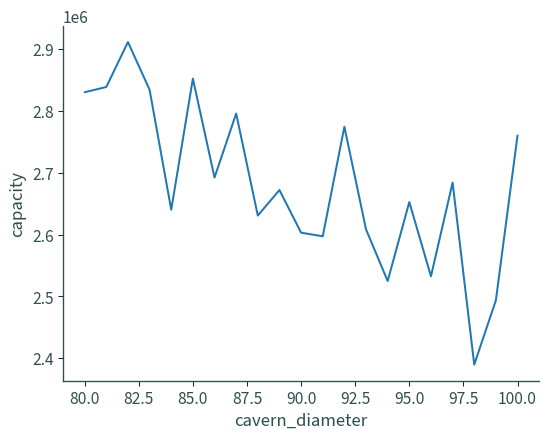

In [46]:
data = df.groupby(["cavern_diameter"]).sum()[["capacity"]].reset_index()
sns.lineplot(data=data, x="cavern_diameter", y="capacity")
sns.despine()
plt.show()

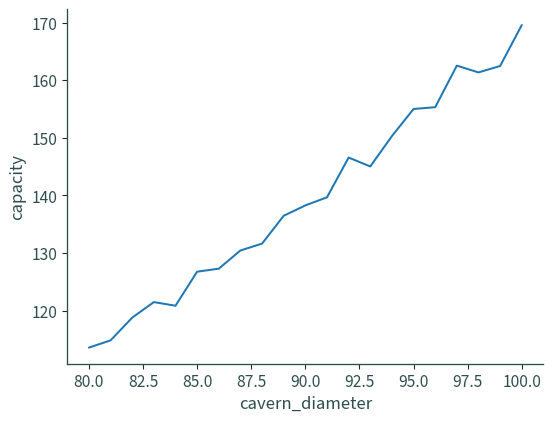

In [45]:
data = df.groupby(["cavern_diameter"]).mean()[["capacity"]].reset_index()
sns.lineplot(data=data, x="cavern_diameter", y="capacity")
sns.despine()
plt.show()

## Base case

In [62]:
base = df[(df["cavern_diameter"] == 85) & (df["cavern_height"] == 120)].reset_index(drop=True)

In [70]:
base.describe()[["capacity"]]

,capacity
count,218.000000
mean,108.634041
std,25.946851
min,55.946359
25%,89.482842
50%,109.211632
75%,129.493525
max,158.798899


In [207]:
base_mean = base[["capacity"]].mean().values[0]

In [90]:
base[["capacity"]].sum().values[0]

23682.2210413918

## Base diameter, varying height, mean capacity

In [170]:
dd = df[(df["cavern_diameter"] == 85)].reset_index(drop=True)

In [200]:
dd_diff = (dd.groupby("cavern_height").mean()["capacity"] - base[["capacity"]].mean().values[0]) / base[["capacity"]].mean().values[0] * 100

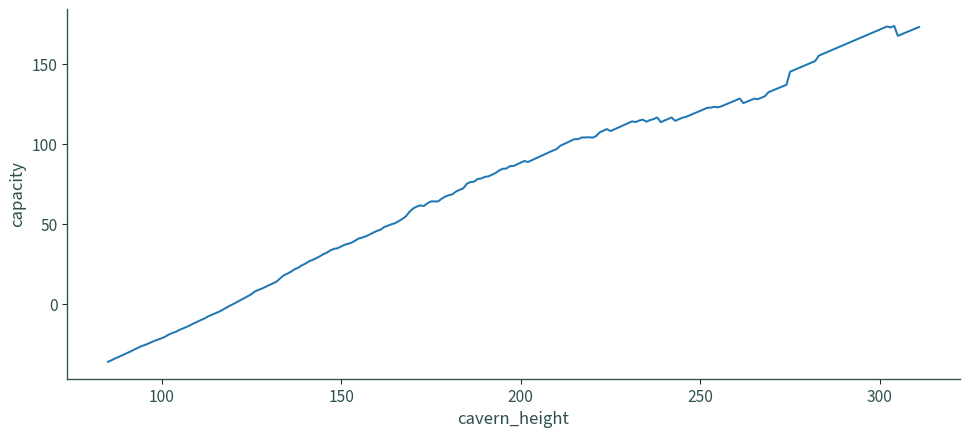

In [201]:
plt.figure(figsize=(12, 5))
sns.lineplot(data=dd_diff)
sns.despine()
plt.show()

## Base diameter, varying height, total capacity

In [197]:
dd_diff = (dd.groupby("cavern_height").sum()["capacity"] - base[["capacity"]].sum().values[0]) / base[["capacity"]].sum().values[0] * 100

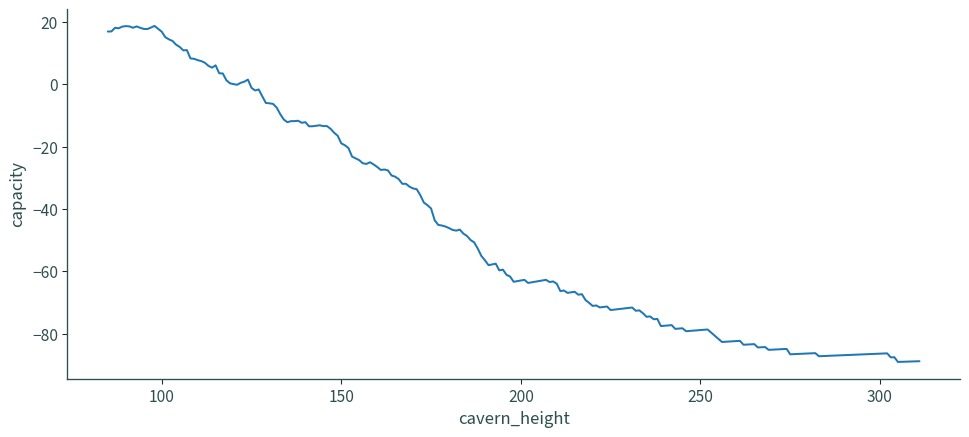

In [199]:
plt.figure(figsize=(12, 5))
sns.lineplot(data=dd_diff)
sns.despine()
plt.show()

## Base height, varying diameter, mean capacity

In [202]:
dh = df[(df["cavern_height"] == 120)].reset_index(drop=True)

In [203]:
dh_diff = (dh.groupby("cavern_diameter").mean()["capacity"] - base[["capacity"]].mean().values[0]) / base[["capacity"]].mean().values[0] * 100

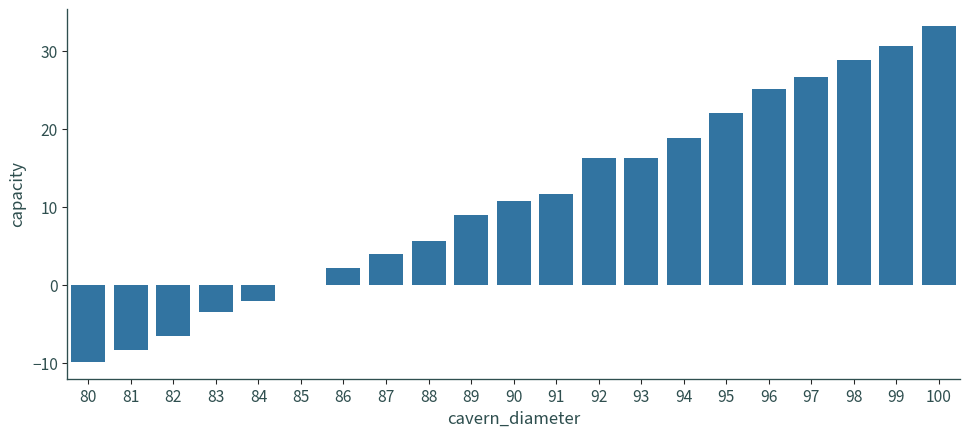

In [204]:
plt.figure(figsize=(12, 5))
sns.barplot(data=dh_diff)
sns.despine()
plt.show()

## Base height, varying diameter, total capacity

In [205]:
dh_diff = (dh.groupby("cavern_diameter").sum()["capacity"] - base[["capacity"]].sum().values[0]) / base[["capacity"]].sum().values[0] * 100

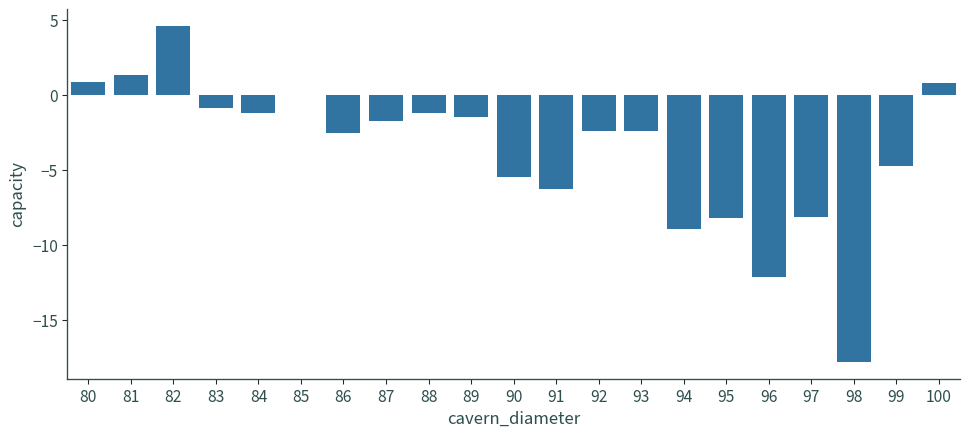

In [206]:
plt.figure(figsize=(12, 5))
sns.barplot(data=dh_diff)
sns.despine()
plt.show()